In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix

Load the CIFAR dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalize pixel values to be between -0.5 and 0.5

$x^* = (b-a)\frac{x - \min{x}}{\max{x} - \min{x}} + a$  , where a=-.5 and b=.5

In [ ]:
train_images, test_images = (train_images / 255.0)-0.5, (test_images / 255.0)-0.5

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid',activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        1824      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 48)        10416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 96)          41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,batch_size=64,epochs=300, validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2994 - accuracy: 0.1066 - val_loss: 2.2926 - val_accuracy: 0.1146
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2869 - accuracy: 0.1362 - val_loss: 2.2789 - val_accuracy: 0.1634
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2702 - accuracy: 0.1829 - val_loss: 2.2571 - val_accuracy: 0.2098
Epoch 4/300
782/782 [==============================] - 3s 3ms/step - loss: 2.2408 - accuracy: 0.2189 - val_loss: 2.2169 - val_accuracy: 0.2340
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1879 - accuracy: 0.2423 - val_loss: 2.1482 - val_accuracy: 0.2537
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1141 - accuracy: 0.2554 - val_loss: 2.0713 - val_accuracy: 0.2678
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 2.0471 - accuracy: 0.2711 - val_loss: 2.0121 - val_accuracy: 0.2849

In [ ]:
model.save_weights('firstModel_noshuffle/')
np.save('firstModel_noshuffle/history',history.history)
!zip -r /content/firstModel_noshuffle.zip /content/firstModel_noshuffle

updating: content/firstModel_noshuffle/ (stored 0%)
updating: content/firstModel_noshuffle/history.npy (deflated 56%)
updating: content/firstModel_noshuffle/checkpoint (deflated 34%)
updating: content/firstModel_noshuffle/.data-00000-of-00001 (deflated 8%)
updating: content/firstModel_noshuffle/.index (deflated 53%)


313/313 - 1s - loss: 1.0014 - accuracy: 0.6773


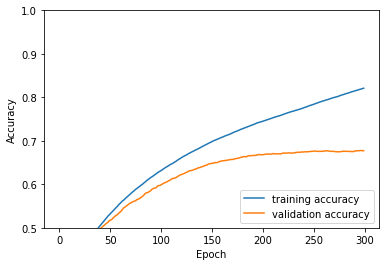

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
test_acc

0.677299976348877

In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(test_images, verbose=0)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
accuracy = accuracy_score(test_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, yhat_classes,average='micro')
print('Recall: %f' % recall)
cm=confusion_matrix(test_labels, yhat_classes)

Accuracy: 0.677300
Recall: 0.677300


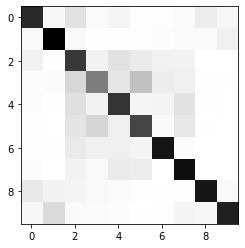

In [ ]:
plt.imshow(cm, cmap='binary')

Results with default architecture: 67,73 % \


## 4 Network Structure

### A1. Number of filters
Change convolutional filter layer sizes from [24,48,96] to [64,128,256]

In [ ]:
model21 = models.Sequential()
model21.add(layers.Conv2D(64, (5, 5),strides=1,padding='valid',activation='relu', input_shape=(32, 32, 3)))
model21.add(layers.MaxPooling2D((2, 2),strides=2))
model21.add(layers.Conv2D(128, (3, 3),strides=1,padding='valid',activation='relu'))
model21.add(layers.MaxPooling2D((2, 2),strides=2))
model21.add(layers.Conv2D(256, (3, 3),strides=1,padding='valid'))
model21.add(layers.MaxPooling2D((2, 2),strides=2))
model21.add(layers.Flatten())
model21.add(layers.Dense(512, activation='relu'))
model21.add(layers.Dense(10, activation='softmax'))

In [ ]:
model21.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [ ]:
opt21 = tf.keras.optimizers.SGD(learning_rate=0.001)
model21.compile(optimizer=opt21,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [ ]:
history21 = model21.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 5s 6ms/step - loss: 2.2949 - accuracy: 0.1500 - val_loss: 2.2848 - val_accuracy: 0.1954
Epoch 2/300
782/782 [==============================] - 4s 6ms/step - loss: 2.2729 - accuracy: 0.2117 - val_loss: 2.2579 - val_accuracy: 0.2284
Epoch 3/300
782/782 [==============================] - 4s 6ms/step - loss: 2.2370 - accuracy: 0.2403 - val_loss: 2.2090 - val_accuracy: 0.2511
Epoch 4/300
782/782 [==============================] - 4s 6ms/step - loss: 2.1739 - accuracy: 0.2517 - val_loss: 2.1304 - val_accuracy: 0.2584
Epoch 5/300
782/782 [==============================] - 4s 6ms/step - loss: 2.0944 - accuracy: 0.2630 - val_loss: 2.0519 - val_accuracy: 0.2780
Epoch 6/300
782/782 [==============================] - 4s 6ms/step - loss: 2.0237 - accuracy: 0.2815 - val_loss: 1.9859 - val_accuracy: 0.2993
Epoch 7/300
782/782 [==============================] - 4s 6ms/step - loss: 1.9638 - accuracy: 0.3001 - val_loss: 1.9316 - val_accuracy: 0.3128

Accuracy: 0.678100
Recall: 0.678100


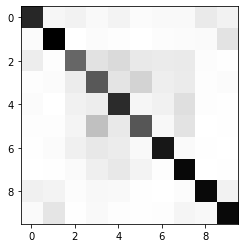

In [ ]:
# predict probabilities for test set
yhat_probs21 = model21.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classes21 = model21.predict_classes(test_images, verbose=0)

accuracy21 = accuracy_score(test_labels, yhat_classes21)
print('Accuracy: %f' % accuracy21)
recall21 = recall_score(test_labels, yhat_classes21,average='micro')
print('Recall: %f' % recall21)
cm21=confusion_matrix(test_labels, yhat_classes21)

plt.imshow(cm21, cmap='binary')


In [ ]:
model21.save_weights('model21_noshuffle/')
np.save('model21_noshuffle/history21',history21.history)
!zip -r /content/model21_noshuffle/model21.zip /content/model21_noshuffle

  adding: content/model21_noshuffle/ (stored 0%)
  adding: content/model21_noshuffle/checkpoint (deflated 34%)
  adding: content/model21_noshuffle/.data-00000-of-00001 (deflated 8%)
  adding: content/model21_noshuffle/history21.npy (deflated 55%)
  adding: content/model21_noshuffle/.index (deflated 53%)


### A2. Number of layers
Insert fully connected layer between FC layers 1 and 2

In [ ]:
model22 = models.Sequential()
model22.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid',activation='relu', input_shape=(32, 32, 3)))
model22.add(layers.MaxPooling2D((2, 2),strides=2))
model22.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid',activation='relu'))
model22.add(layers.MaxPooling2D((2, 2),strides=2))
model22.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
model22.add(layers.MaxPooling2D((2, 2),strides=2))
model22.add(layers.Flatten())
model22.add(layers.Dense(512, activation='relu'))
model22.add(layers.Dense(128, activation='relu'))
model22.add(layers.Dense(10, activation='softmax'))

In [ ]:
model22.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 24)        1824      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 48)        10416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 96)          41568     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)              

In [ ]:
opt22 = tf.keras.optimizers.SGD(learning_rate=0.001)
model22.compile(optimizer=opt22,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [ ]:
history22 = model22.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 2.3016 - accuracy: 0.0869 - val_loss: 2.2980 - val_accuracy: 0.1033
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2952 - accuracy: 0.1269 - val_loss: 2.2919 - val_accuracy: 0.1570
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2884 - accuracy: 0.1767 - val_loss: 2.2841 - val_accuracy: 0.1948
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2790 - accuracy: 0.2076 - val_loss: 2.2726 - val_accuracy: 0.2247
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2644 - accuracy: 0.2322 - val_loss: 2.2536 - val_accuracy: 0.2426
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2390 - accuracy: 0.2464 - val_loss: 2.2190 - val_accuracy: 0.2512
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1929 - accuracy: 0.2496 - val_loss: 2.1575 - val_accuracy: 0.2528

Accuracy: 0.678300
Recall: 0.678300


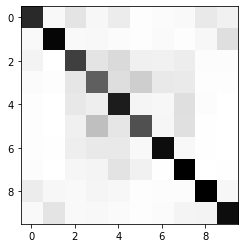

In [ ]:
# predict probabilities for test set
yhat_probs22 = model22.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classes22 = model22.predict_classes(test_images, verbose=0)

accuracy22 = accuracy_score(test_labels, yhat_classes22)
print('Accuracy: %f' % accuracy22)
recall22 = recall_score(test_labels, yhat_classes22,average='micro')
print('Recall: %f' % recall22)
cm22=confusion_matrix(test_labels, yhat_classes22)

plt.imshow(cm22, cmap='binary')


In [ ]:
model22.save_weights('secondModel/')
import numpy as np
np.save('secondModel/history22',history22.history)
!zip -r /content/secondModel/secondModel22.zip /content/secondModel

  adding: content/secondModel/ (stored 0%)
  adding: content/secondModel/checkpoint (deflated 34%)
  adding: content/secondModel/.data-00000-of-00001 (deflated 8%)
  adding: content/secondModel/.index (deflated 55%)
  adding: content/secondModel/history22.npy (deflated 55%)


Recall for A1: 67,81% \\
Recall for A2: 67,83% \\

## B. Filter size
Working on on A2: \\

Changing filter size of conv layer 1 and 2 to 7x7 and 5x5

In [ ]:
modelB = models.Sequential()
modelB.add(layers.Conv2D(24, (7, 7),strides=1,padding='valid',activation='relu', input_shape=(32, 32, 3)))
modelB.add(layers.MaxPooling2D((2, 2),strides=2))
modelB.add(layers.Conv2D(48, (5, 5),strides=1,padding='valid',activation='relu'))
modelB.add(layers.MaxPooling2D((2, 2),strides=2))
modelB.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
modelB.add(layers.MaxPooling2D((2, 2),strides=2))
modelB.add(layers.Flatten())
modelB.add(layers.Dense(512, activation='relu'))
modelB.add(layers.Dense(128, activation='relu'))
modelB.add(layers.Dense(10, activation='softmax'))

In [ ]:
optB = tf.keras.optimizers.SGD(learning_rate=0.001)
modelB.compile(optimizer=optB,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [ ]:
historyB = modelB.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 2.3017 - accuracy: 0.1139 - val_loss: 2.2988 - val_accuracy: 0.1441
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2959 - accuracy: 0.1712 - val_loss: 2.2923 - val_accuracy: 0.1965
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2881 - accuracy: 0.2065 - val_loss: 2.2823 - val_accuracy: 0.2235
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2757 - accuracy: 0.2211 - val_loss: 2.2659 - val_accuracy: 0.2311
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2542 - accuracy: 0.2191 - val_loss: 2.2366 - val_accuracy: 0.2206
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2160 - accuracy: 0.2154 - val_loss: 2.1852 - val_accuracy: 0.2211
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1559 - accuracy: 0.2215 - val_loss: 2.1153 - val_accuracy: 0.2319

Accuracy: 0.647500
Recall: 0.647500


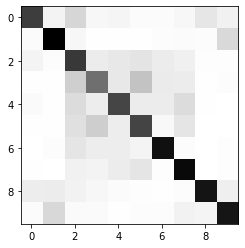

In [ ]:
# predict probabilities for test set
yhat_probsB = modelB.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classesB = modelB.predict_classes(test_images, verbose=0)

accuracyB = accuracy_score(test_labels, yhat_classesB)
print('Accuracy: %f' % accuracyB)
recallB = recall_score(test_labels, yhat_classesB,average='micro')
print('Recall: %f' % recallB)
cmB=confusion_matrix(test_labels, yhat_classesB)

plt.imshow(cmB, cmap='binary')


In [ ]:
modelB.save_weights('modelB_noshuffle/')

np.save('modelB_noshuffle/historyB_noshuffle',historyB.history)
!zip -r /content/modelB_noshuffle/secondModelB_noshuffle.zip /content/modelB_noshuffle

  adding: content/modelB_noshuffle/ (stored 0%)
  adding: content/modelB_noshuffle/historyB_noshuffle.npy (deflated 55%)
  adding: content/modelB_noshuffle/checkpoint (deflated 34%)
  adding: content/modelB_noshuffle/.data-00000-of-00001 (deflated 8%)
  adding: content/modelB_noshuffle/.index (deflated 55%)


Recall before changing filter sizes: 67,83% \
Recall after changing filter sizes: 64.75%

Continuing with A2 (not changing filter size)

## C. ReLU vs. Leaky ReLu
Changing all ReLu activation functions to Leaky ReLu

In [ ]:
modelC = models.Sequential()
modelC.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid', input_shape=(32, 32, 3)))
modelC.add(layers.LeakyReLU(alpha=0.3))
modelC.add(layers.MaxPooling2D((2, 2),strides=2))
modelC.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid'))
modelC.add(layers.LeakyReLU(alpha=0.3))
modelC.add(layers.MaxPooling2D((2, 2),strides=2))
modelC.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
modelC.add(layers.MaxPooling2D((2, 2),strides=2))
modelC.add(layers.Flatten())
modelC.add(layers.Dense(512))
modelC.add(layers.LeakyReLU(alpha=0.3))
modelC.add(layers.Dense(128))
modelC.add(layers.LeakyReLU(alpha=0.3))
modelC.add(layers.Dense(10, activation='softmax'))

In [ ]:
optC = tf.keras.optimizers.SGD(learning_rate=0.001)

modelC.compile(optimizer=optC,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

historyC = modelC.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2947 - accuracy: 0.1067 - val_loss: 2.2866 - val_accuracy: 0.1140
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2766 - accuracy: 0.1380 - val_loss: 2.2649 - val_accuracy: 0.1528
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2479 - accuracy: 0.1702 - val_loss: 2.2274 - val_accuracy: 0.1840
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1997 - accuracy: 0.1968 - val_loss: 2.1679 - val_accuracy: 0.2124
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1339 - accuracy: 0.2394 - val_loss: 2.0963 - val_accuracy: 0.2636
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 2.0629 - accuracy: 0.2737 - val_loss: 2.0249 - val_accuracy: 0.2860
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 1.9976 - accuracy: 0.2881 - val_loss: 1.9643 - val_accuracy: 0.2988

Accuracy: 0.673400
Recall: 0.673400


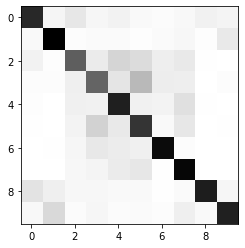

In [ ]:
# predict probabilities for test set
yhat_probsC = modelC.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classesC = modelC.predict_classes(test_images, verbose=0)

accuracyC = accuracy_score(test_labels, yhat_classesC)
print('Accuracy: %f' % accuracyC)
recallC = recall_score(test_labels, yhat_classesC,average='micro')
print('Recall: %f' % recallC)
cmC=confusion_matrix(test_labels, yhat_classesC)

plt.imshow(cmC, cmap='binary')


In [ ]:
modelC.save_weights('modelC_noshuffle/')

np.save('modelC_noshuffle/historyC_noshuffle',historyC.history)
!zip -r /content/modelC_noshuffle/modelC_noshuffle.zip /content/modelC_noshuffle

  adding: content/modelC_noshuffle/ (stored 0%)
  adding: content/modelC_noshuffle/historyC_noshuffle.npy (deflated 56%)
  adding: content/modelC_noshuffle/checkpoint (deflated 34%)
  adding: content/modelC_noshuffle/.data-00000-of-00001 (deflated 8%)
  adding: content/modelC_noshuffle/.index (deflated 55%)


Recall with ReLU: 67,83% \
Recall with LeakyReLU: 67,34% \
Continuing with ReLU

# D. Dropout vs. without Dropout
Adding dropout regularization between FC layer 1 and 2. Dropout = 0.3.

In [ ]:
modelD = models.Sequential()
modelD.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid', activation='relu', input_shape=(32, 32, 3)))
modelD.add(layers.MaxPooling2D((2, 2),strides=2))
modelD.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid', activation='relu'))
modelD.add(layers.MaxPooling2D((2, 2),strides=2))
modelD.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
modelD.add(layers.MaxPooling2D((2, 2),strides=2))
modelD.add(layers.Flatten())
modelD.add(layers.Dense(512,activation='relu'))
modelD.add(layers.Dropout(0.3))
modelD.add(layers.Dense(128,activation='relu'))
modelD.add(layers.Dense(10, activation='softmax'))

In [ ]:
optD = tf.keras.optimizers.SGD(learning_rate=0.001)

modelD.compile(optimizer=optD,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

historyD = modelD.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 2.3022 - accuracy: 0.1067 - val_loss: 2.2982 - val_accuracy: 0.1455
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2966 - accuracy: 0.1378 - val_loss: 2.2914 - val_accuracy: 0.1830
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2898 - accuracy: 0.1697 - val_loss: 2.2825 - val_accuracy: 0.2151
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2802 - accuracy: 0.1926 - val_loss: 2.2692 - val_accuracy: 0.2281
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2648 - accuracy: 0.2073 - val_loss: 2.2475 - val_accuracy: 0.2298
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2388 - accuracy: 0.2168 - val_loss: 2.2097 - val_accuracy: 0.2382
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1937 - accuracy: 0.2249 - val_loss: 2.1466 - val_accuracy: 0.2394

Accuracy: 0.719000
Recall: 0.719000


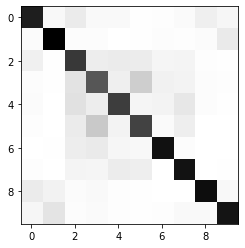

In [ ]:
# predict probabilities for test set
yhat_probsD = modelD.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classesD = modelD.predict_classes(test_images, verbose=0)

accuracyD = accuracy_score(test_labels, yhat_classesD)
print('Accuracy: %f' % accuracyD)
recallD = recall_score(test_labels, yhat_classesD,average='micro')
print('Recall: %f' % recallD)
cmD=confusion_matrix(test_labels, yhat_classesD)

plt.imshow(cmD, cmap='binary')


In [ ]:
modelD.save_weights('modelD_noshuffle/')

np.save('modelD_noshuffle/historyD_noshuffle',historyD.history)
!zip -r /content/modelD_noshuffle/modelD_noshuffle.zip /content/modelD_noshuffle

  adding: content/modelD_noshuffle/ (stored 0%)
  adding: content/modelD_noshuffle/historyD_noshuffle.npy (deflated 55%)
  adding: content/modelD_noshuffle/checkpoint (deflated 34%)
  adding: content/modelD_noshuffle/.data-00000-of-00001 (deflated 8%)
  adding: content/modelD_noshuffle/.index (deflated 55%)


In [ ]:
modelD.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 24)        1824      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 48)        10416     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 96)          41568     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 96)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 384)              

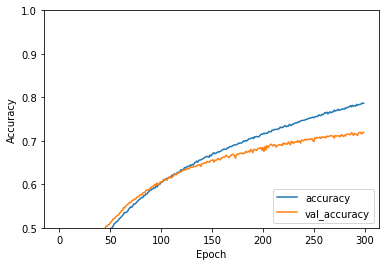

In [ ]:
plt.plot(historyD.history['accuracy'], label='accuracy')
plt.plot(historyD.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('finalmodel.png')

Recall with dropout: 71,90%\
Recall without: 67,83%\
Proceeding with dropout!

# E. Batch Normalization Layer
Using Dropout or not? Adding batch normalization after each activation function.

In [ ]:
modelE = models.Sequential()
modelE.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid', activation='relu', input_shape=(32, 32, 3)))
modelE.add(layers.BatchNormalization())
modelE.add(layers.MaxPooling2D((2, 2),strides=2))
modelE.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid', activation='relu'))
modelE.add(layers.BatchNormalization())
modelE.add(layers.MaxPooling2D((2, 2),strides=2))
modelE.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
modelE.add(layers.MaxPooling2D((2, 2),strides=2))
modelE.add(layers.Flatten())
modelE.add(layers.Dense(512,activation='relu'))
modelE.add(layers.BatchNormalization())
modelE.add(layers.Dropout(0.3))
modelE.add(layers.Dense(128,activation='relu'))
modelE.add(layers.BatchNormalization())
modelE.add(layers.Dense(10, activation='softmax'))

In [ ]:
optE = tf.keras.optimizers.SGD(learning_rate=0.001)

modelE.compile(optimizer=optE,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

historyE = modelE.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 4s 5ms/step - loss: 2.1212 - accuracy: 0.2847 - val_loss: 1.6934 - val_accuracy: 0.3949
Epoch 2/300
782/782 [==============================] - 4s 5ms/step - loss: 1.7328 - accuracy: 0.3891 - val_loss: 1.5727 - val_accuracy: 0.4429
Epoch 3/300
782/782 [==============================] - 4s 5ms/step - loss: 1.5899 - accuracy: 0.4365 - val_loss: 1.4701 - val_accuracy: 0.4721
Epoch 4/300
782/782 [==============================] - 5s 6ms/step - loss: 1.5029 - accuracy: 0.4681 - val_loss: 1.4359 - val_accuracy: 0.4925
Epoch 5/300
782/782 [==============================] - 4s 6ms/step - loss: 1.4412 - accuracy: 0.4866 - val_loss: 1.3739 - val_accuracy: 0.5076
Epoch 6/300
782/782 [==============================] - 4s 5ms/step - loss: 1.3877 - accuracy: 0.5063 - val_loss: 1.3661 - val_accuracy: 0.5160
Epoch 7/300
782/782 [==============================] - 4s 6ms/step - loss: 1.3410 - accuracy: 0.5213 - val_loss: 1.3426 - val_accuracy: 0.5276

Accuracy: 0.674700
Recall: 0.674700


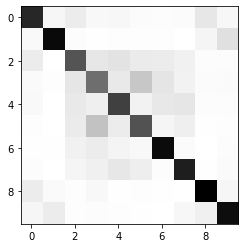

In [ ]:
# predict probabilities for test set
yhat_probsE = modelE.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classesE = modelE.predict_classes(test_images, verbose=0)

accuracyE = accuracy_score(test_labels, yhat_classesE)
print('Accuracy: %f' % accuracyE)
recallE = recall_score(test_labels, yhat_classesE,average='micro')
print('Recall: %f' % recallE)
cmE=confusion_matrix(test_labels, yhat_classesE)

plt.imshow(cmE, cmap='binary')


In [ ]:
modelE.save_weights('modelE_noshuffle/')

np.save('modelE_noshuffle/historyE_noshuffle',historyE.history)
!zip -r /content/modelE_noshuffle/modelE_noshuffle.zip /content/modelE_noshuffle

  adding: content/modelE_noshuffle/ (stored 0%)
  adding: content/modelE_noshuffle/checkpoint (deflated 34%)
  adding: content/modelE_noshuffle/.data-00000-of-00001 (deflated 8%)
  adding: content/modelE_noshuffle/historyE_noshuffle.npy (deflated 56%)
  adding: content/modelE_noshuffle/.index (deflated 63%)


With batch norm: 67,47%\
Without: 71,90%

# Final result
Best model: Model D (71,90%)

# 5 Training Settings
## A. Vary Batch size. 
Using model D. Changing batchsize from 64 to 256

In [ ]:
model5A = models.Sequential()
model5A.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid', activation='relu', input_shape=(32, 32, 3)))
model5A.add(layers.MaxPooling2D((2, 2),strides=2))
model5A.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid', activation='relu'))
model5A.add(layers.MaxPooling2D((2, 2),strides=2))
model5A.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
model5A.add(layers.MaxPooling2D((2, 2),strides=2))
model5A.add(layers.Flatten())
model5A.add(layers.Dense(512,activation='relu'))
model5A.add(layers.Dropout(0.3))
model5A.add(layers.Dense(128,activation='relu'))
model5A.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt5A = tf.keras.optimizers.SGD(learning_rate=0.001)

model5A.compile(optimizer=opt5A,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history5A = model5A.fit(train_images, train_labels,batch_size=256,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
196/196 [==============================] - 2s 9ms/step - loss: 2.3032 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0941
Epoch 2/300
196/196 [==============================] - 1s 8ms/step - loss: 2.3017 - accuracy: 0.1032 - val_loss: 2.3012 - val_accuracy: 0.1008
Epoch 3/300
196/196 [==============================] - 1s 8ms/step - loss: 2.3001 - accuracy: 0.1112 - val_loss: 2.2997 - val_accuracy: 0.1145
Epoch 4/300
196/196 [==============================] - 1s 7ms/step - loss: 2.2986 - accuracy: 0.1186 - val_loss: 2.2981 - val_accuracy: 0.1258
Epoch 5/300
196/196 [==============================] - 1s 7ms/step - loss: 2.2976 - accuracy: 0.1253 - val_loss: 2.2966 - val_accuracy: 0.1373
Epoch 6/300
196/196 [==============================] - 1s 8ms/step - loss: 2.2960 - accuracy: 0.1330 - val_loss: 2.2950 - val_accuracy: 0.1465
Epoch 7/300
196/196 [==============================] - 1s 7ms/step - loss: 2.2943 - accuracy: 0.1416 - val_loss: 2.2934 - val_accuracy: 0.1552

Accuracy: 0.573900
Recall: 0.573900


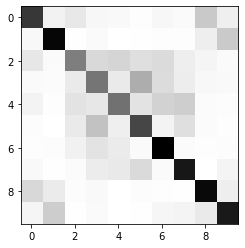

In [ ]:
# predict probabilities for test set
yhat_probs5A = model5A.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classes5A = model5A.predict_classes(test_images, verbose=0)

accuracy5A = accuracy_score(test_labels, yhat_classes5A)
print('Accuracy: %f' % accuracy5A)
recall5A = recall_score(test_labels, yhat_classes5A,average='micro')
print('Recall: %f' % recall5A)
cm5A=confusion_matrix(test_labels, yhat_classes5A)

plt.imshow(cm5A, cmap='binary')


In [ ]:
model5A.save_weights('model5A_noshuffle/')
np.save('model5A_noshuffle/history5A_noshuffle',history5A.history)
!zip -r /content/model5A_noshuffle/model5A_noshuffle.zip /content/model5A_noshuffle

  adding: content/model5A_noshuffle/ (stored 0%)
  adding: content/model5A_noshuffle/history5A_noshuffle.npy (deflated 55%)
  adding: content/model5A_noshuffle/checkpoint (deflated 34%)
  adding: content/model5A_noshuffle/.data-00000-of-00001 (deflated 8%)
  adding: content/model5A_noshuffle/.index (deflated 55%)


# Results with batchsize
256 : 57.39%
64 : 71,90%
### Continuing with batchsize 64
Training time with BS 64 ~ 20 mins (4s per epoch)\
Training time with bs 256 ~ 10 mins (2s per epoch)

# B. Using learning rate 0.1

In [ ]:
model5B = models.Sequential()
model5B.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid', activation='relu', input_shape=(32, 32, 3)))
model5B.add(layers.MaxPooling2D((2, 2),strides=2))
model5B.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid', activation='relu'))
model5B.add(layers.MaxPooling2D((2, 2),strides=2))
model5B.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
model5B.add(layers.MaxPooling2D((2, 2),strides=2))
model5B.add(layers.Flatten())
model5B.add(layers.Dense(512,activation='relu'))
model5B.add(layers.Dropout(0.3))
model5B.add(layers.Dense(128,activation='relu'))
model5B.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt5B = tf.keras.optimizers.SGD(learning_rate=0.1)

model5B.compile(optimizer=opt5B,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history5B = model5B.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 1.7247 - accuracy: 0.3699 - val_loss: 2.0686 - val_accuracy: 0.3126
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 1.3359 - accuracy: 0.5196 - val_loss: 1.5287 - val_accuracy: 0.4558
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 1.1587 - accuracy: 0.5865 - val_loss: 1.2658 - val_accuracy: 0.5511
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 1.0247 - accuracy: 0.6376 - val_loss: 1.1572 - val_accuracy: 0.5964
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 0.9214 - accuracy: 0.6759 - val_loss: 1.0087 - val_accuracy: 0.6492
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 0.8352 - accuracy: 0.7038 - val_loss: 1.0725 - val_accuracy: 0.6436
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 0.7659 - accuracy: 0.7297 - val_loss: 1.3045 - val_accuracy: 0.5974

Accuracy: 0.100000
Recall: 0.100000


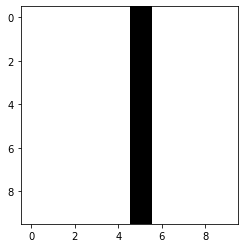

In [ ]:
# predict probabilities for test set
yhat_probs5B = model5B.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classes5B = model5B.predict_classes(test_images, verbose=0)

accuracy5B = accuracy_score(test_labels, yhat_classes5B)
print('Accuracy: %f' % accuracy5B)
recall5B = recall_score(test_labels, yhat_classes5B,average='micro')
print('Recall: %f' % recall5B)
cm5B=confusion_matrix(test_labels, yhat_classes5B)

plt.imshow(cm5B, cmap='binary')


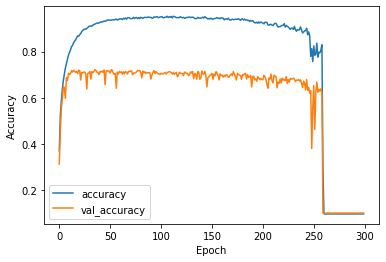

In [ ]:
plt.plot(history5B.history['accuracy'], label='accuracy')
plt.plot(history5B.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig('model5B_div.png')

# Resulting recall : 10%
Validation accuracy quickly ~70-72% but eventually degrades.  The learning rate is too large for the model to converge to a meaningful solution.\
Continuing with learning rate 0.001

# C: Shuffling

In [ ]:
model5C = models.Sequential()
model5C.add(layers.Conv2D(24, (5, 5),strides=1,padding='valid', activation='relu', input_shape=(32, 32, 3)))
model5C.add(layers.MaxPooling2D((2, 2),strides=2))
model5C.add(layers.Conv2D(48, (3, 3),strides=1,padding='valid', activation='relu'))
model5C.add(layers.MaxPooling2D((2, 2),strides=2))
model5C.add(layers.Conv2D(96, (3, 3),strides=1,padding='valid'))
model5C.add(layers.MaxPooling2D((2, 2),strides=2))
model5C.add(layers.Flatten())
model5C.add(layers.Dense(512,activation='relu'))
model5C.add(layers.Dropout(0.3))
model5C.add(layers.Dense(128,activation='relu'))
model5C.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt5C = tf.keras.optimizers.SGD(learning_rate=0.001)

model5C.compile(optimizer=opt5C,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history5C = model5C.fit(train_images, train_labels,batch_size=64,epochs=300, 
                    validation_data=(test_images, test_labels),shuffle=False)

Epoch 1/300
782/782 [==============================] - 3s 4ms/step - loss: 2.3003 - accuracy: 0.1204 - val_loss: 2.2973 - val_accuracy: 0.1278
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2942 - accuracy: 0.1382 - val_loss: 2.2902 - val_accuracy: 0.1468
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2867 - accuracy: 0.1478 - val_loss: 2.2801 - val_accuracy: 0.1612
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2748 - accuracy: 0.1589 - val_loss: 2.2639 - val_accuracy: 0.1735
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2557 - accuracy: 0.1704 - val_loss: 2.2379 - val_accuracy: 0.1929
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 2.2260 - accuracy: 0.1826 - val_loss: 2.2001 - val_accuracy: 0.2064
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 2.1875 - accuracy: 0.2001 - val_loss: 2.1525 - val_accuracy: 0.2303

Accuracy: 0.716400
Recall: 0.716400


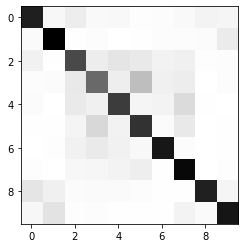

In [ ]:
# predict probabilities for test set
yhat_probs5C = model5C.predict(test_images, verbose=0)
# predict crisp classes for test set
yhat_classes5C = model5C.predict_classes(test_images, verbose=0)

accuracy5C = accuracy_score(test_labels, yhat_classes5C)
print('Accuracy: %f' % accuracy5C)
recall5C = recall_score(test_labels, yhat_classes5C,average='micro')
print('Recall: %f' % recall5C)
cm5C=confusion_matrix(test_labels, yhat_classes5C)

plt.imshow(cm5C, cmap='binary')


In [ ]:
model5C.save_weights('model5C/')
import numpy as np
np.save('model5C/history5C',history5C.history)
!zip -r /content/model5C/model5C.zip /content/model5C

  adding: content/model5C/ (stored 0%)
  adding: content/model5C/checkpoint (deflated 34%)
  adding: content/model5C/history5C.npy (deflated 55%)
  adding: content/model5C/.data-00000-of-00001 (deflated 8%)
  adding: content/model5C/.index (deflated 55%)
